In [1]:
import sys
sys.path.append('..')
from MPRA_exp.utils import *
from MPRA_exp.metrics import *

from sklearn.linear_model import LinearRegression, Lasso

In [ ]:
def find_indice(info_df, cell_types=[], assays=[], IDs=[]):
    # 初始化索引为全部行
    indice = list(range(len(info_df)))
    
    # 如果 cell_types 不为空，则筛选 cell_type
    if cell_types:
        indice = [i for i in indice if info_df['cell_type'][i] in cell_types]
        
    # 如果 assays 不为空，则筛选 assay
    if assays:
        indice = [i for i in indice if info_df['assay'][i] in assays]
        
    # 如果 IDs 不为空，则筛选 ID
    if IDs:
        indice = [i for i in indice if info_df['ID'][i] in IDs]
    
    return indice





def plot(main_df, cell_type, assay):
    x = main_df[f'{cell_type}_{assay}_pred']
    y = main_df[cell_type]
    r = pearsonr(x, y)[0]
    print(f'pearson r = {r:.3f}')

    fig, ax = plt.subplots(figsize=(8, 6), dpi=50)
    left, right, bottom, top = 0.13, 0.93, 0.15, 0.95
    ax.set_position([left, bottom, right - left, top - bottom])
    sns.scatterplot(x=x, y=y, s=1, edgecolor=None, ax=ax)
    ax.set_xlabel(f'{cell_type}_{assay}_pred')
    ax.set_ylabel(f'{cell_type}_MPRA_true')
    ax.text(x=0.1, y=0.9, s=f'pearson r = {r:.3f}', transform=ax.transAxes, fontsize=16)
    plt.savefig(f'figures/{cell_type}_{assay}_pred.png', dpi=200)


def plot_logit(main_df, cell_type, assay):
    x = logit(main_df[f'{cell_type}_{assay}_pred'])
    y = main_df[cell_type]
    r = pearsonr(x, y)[0]
    print(f'pearson r = {r:.3f}')

    plot_scatter(x, y, 
                 xlabel=f'{cell_type}_{assay}_pred_logit', 
                 ylabel=f'{cell_type}_MPRA_true', 
                 text=f'pearson r = {r:.3f}', 
                 title=f'', 
                 filename=f'{cell_type}_{assay}_pred_logit')

    # fig, ax = plt.subplots(figsize=(8, 6), dpi=50)
    # left, right, bottom, top = 0.13, 0.93, 0.15, 0.95
    # ax.set_position([left, bottom, right - left, top - bottom])
    # sns.scatterplot(x=x, y=y, s=1, edgecolor=None, ax=ax)
    # ax.set_xlabel(f'{cell_type}_{assay}_pred_logit')
    # ax.set_ylabel(f'{cell_type}_MPRA_true')
    # ax.text(x=0.1, y=0.9, s=f'pearson r = {r:.3f}', transform=ax.transAxes, fontsize=16)
    # plt.savefig(f'figures/{cell_type}_{assay}_pred_logit.png', dpi=200)

    # plt.figure(figsize=(8, 6), dpi=50)
    # sns.scatterplot(x=x, y=y, s=1, edgecolor=None)
    # plt.xlabel(f'{cell_type}_{assay}_pred_logit')
    # plt.ylabel(f'{cell_type}_MPRA_true')
    # plt.text(x=0.1, y=0.9, s=f'pearson r = {r:.3f}', transform=plt.gca().transAxes, fontsize=16)
    # plt.savefig(f'figures/{cell_type}_{assay}_pred_logit.png', dpi=300, bbox_inches='tight')


def plot_scatter(x, y, xlabel='', ylabel='', text='', title='', filename=''):
    fig, ax = plt.subplots(figsize=(8, 6), dpi=50)
    left, right, bottom, top = 0.13, 0.93, 0.15, 0.95
    ax.set_position([left, bottom, right - left, top - bottom])
    sns.scatterplot(x=x, y=y, s=1, edgecolor=None, ax=ax)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.text(x=0.1, y=0.9, s=text, transform=ax.transAxes, fontsize=16)
    plt.title(title)
    plt.savefig(f'figures/{filename}.png', dpi=200)


# def plot_logit_diff(main_df, cell_type1, cell_type2, assay):
#     x = logit(main_df[f'{cell_type1}_{assay}_pred']) - logit(main_df[f'{cell_type2}_{assay}_pred'])
#     y = main_df[cell_type1] - main_df[cell_type2]

#     r = pearsonr(x, y)[0]
#     print(f'pearson r = {r:.3f}')

#     fig, ax = plt.subplots(figsize=(8, 6), dpi=50)
#     left, right, bottom, top = 0.13, 0.93, 0.15, 0.95
#     ax.set_position([left, bottom, right - left, top - bottom])
#     sns.scatterplot(x=x, y=y, s=1, edgecolor=None, ax=ax)
#     ax.set_xlabel(f'{cell_type1}_{cell_type2}_{assay}_pred_logit_diff')
#     ax.set_ylabel(f'{cell_type1}_{cell_type2}_MPRA_true_diff')
#     ax.text(x=0.1, y=0.9, s=f'pearson r = {r:.3f}', transform=ax.transAxes, fontsize=16)
#     plt.savefig(f'figures/{cell_type1}_{cell_type2}_{assay}_pred_logit_diff.png', dpi=200)



def pearson(x, y, allow_nan=True):
    if len(x) == 0 or len(y) == 0:
        return np.nan
    
    x_mask = ~np.isnan(x)
    y_mask = ~np.isnan(y)
    mask = x_mask & y_mask
    x = x[mask]
    y = y[mask]

    if len(x) == 0 or len(y) == 0:
        return np.nan
    if len(x) / len(mask) < 0.1:
        print(f'{mask.sum()} (less than 10%) values are non-nan.')

    r, _ = pearsonr(x, y)
    return r


def spearman(x, y, allow_nan=True):
    if len(x) == 0 or len(y) == 0:
        return np.nan
    
    x_mask = ~np.isnan(x)
    y_mask = ~np.isnan(y)
    mask = x_mask & y_mask
    x = x[mask]
    y = y[mask]

    if len(x) == 0 or len(y) == 0:
        return np.nan
    if len(x) / len(mask) < 0.1:
        print(f'less than 10% values are non-nan.')
    
    r, _ = spearmanr(x, y)
    return r

In [3]:
# info_df = pd.read_csv('../pretrained_models/Sei/Sei_info.csv')
# print(info_df.shape)

# pretrained_pred = np.load('../pretrained_models/Sei/Sei_Siraj_pred_3.npy')
# print(pretrained_pred.shape)

# indice = find_indice(info_df, IDs=['ENCODE', 'Roadmap'])
# info_df.iloc[indice].to_csv('../pretrained_models/Sei/Sei_info_2002.csv', index=False)
# np.save('../pretrained_models/Sei/Sei_Siraj_pred_2002.npy', pretrained_pred[:, indice])

In [4]:
info_df = pd.read_csv('../pretrained_models/Sei/Sei_info_2002.csv')
info_df

,cell_type,assay,ID,part
0,4star,H3K27me3,Roadmap,0
1,4star,H3K36me3,Roadmap,0
2,4star,H3K4me1,Roadmap,0
3,4star,H3K4me3,Roadmap,0
4,4star,H3K9me3,Roadmap,0
...,...,...,...,...
1997,WERI-Rb-1,CTCF,ENCODE,0
1998,WERI-Rb-1,DNase,ENCODE,0
1999,WI-38,CTCF,ENCODE,0
2000,WI-38 (4OHTAM_20nM_72hr),DNase,ENCODE,0


In [5]:
# def load_npy(filename):
#     data = []
#     with open(filename, 'rb') as f:
#         while True:
#             try:
#                 d = np.load(f)
#                 data.append(d)
#             except EOFError:
#                 break
#     data = np.concatenate(data, axis=0)
#     return data

# pretrained_pred = load_npy('../pretrained_models/Sei/Sei_Siraj_pred_2.npy')
# print(pretrained_pred.shape)
# np.save('../pretrained_models/Sei/Sei_Siraj_pred_3.npy', pretrained_pred)

In [6]:
pretrained_pred = np.load('../pretrained_models/Sei/Sei_Siraj_pred_2002.npy')
print(pretrained_pred.shape)

(585605, 2002)


In [7]:
main_df = pd.read_csv('/home/hxcai/cell_type_specific_CRE/data/SirajMPRA/SirajMPRA_total.csv')
print(main_df.shape)

(585605, 11)


In [8]:
# # 定义细胞所有可能的名字
aliases_dict = {
    'HepG2': [
        r"hepg2",
        r"hepatocellular[_\s-]*carcinoma",
        r"hep[_\s-]*g[_\s-]*2",
        ],
    'K562': [
        r"K562",
    ],
    'SKNSH': [
        r"neuroblastoma",
        r"SKNSH",
        r"SK-N-SH",
    ],
    'A549': [
        r"A549",
    ],
    'HCT116': [
        r"HCT116",
        r"colon",
    ],
    # 'WTC11': [
    #     r"WTC11",
    #     r"iPS",
    # ],
}


assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3']
cell_types = ['HepG2', 'K562', 'SKNSH', 'A549', 'HCT116']

for cell_type in aliases_dict:
    aliases = aliases_dict[cell_type]
    pattern = re.compile("|".join(aliases), re.IGNORECASE) # 不区分大小写
    matched_indice = [i for i in range(len(info_df))
                      if pattern.search(info_df['cell_type'][i]) and info_df['assay'][i] in assays and info_df['ID'][i] in (['ENCODE', 'Roadmap'])]
    
    # pd.set_option('display.max_rows', None)
    # print(info_df.iloc[matched_indice])
    # pd.set_option('display.max_rows', 10)
    matched_names = info_df.iloc[matched_indice]['cell_type']
    unique_matched_names = list(set(matched_names))
    for name in unique_matched_names:
        print(f'{name}: {matched_names.tolist().count(name)}')

    for i in matched_indice:
        x = logit(pretrained_pred[:, i])
        y = main_df[cell_type]
        r = pearson(x, y)
        print(f'{" ".join(info_df.iloc[i].astype(str).tolist())} pearson r = {r:.3f}')

HepG2 DNase ENCODE 0 pearson r = 0.393
HepG2_Hepatocellular_Carcinoma DNase Roadmap 0 pearson r = 0.459
HepG2_Hepatocellular_Carcinoma H3K27ac Roadmap 0 pearson r = 0.401
HepG2_Hepatocellular_Carcinoma H3K27me3 Roadmap 0 pearson r = 0.154
HepG2_Hepatocellular_Carcinoma H3K36me3 Roadmap 0 pearson r = 0.082
HepG2_Hepatocellular_Carcinoma H3K4me1 Roadmap 0 pearson r = 0.338
HepG2_Hepatocellular_Carcinoma H3K4me3 Roadmap 0 pearson r = 0.474
HepG2_Hepatocellular_Carcinoma H3K9me3 Roadmap 0 pearson r = -0.031
K562 DNase ENCODE 0 pearson r = 0.483
K562 DNase Roadmap 1 pearson r = 0.425
K562 H3K27ac Roadmap 0 pearson r = 0.433
K562 H3K27me3 Roadmap 0 pearson r = 0.106
K562 H3K36me3 Roadmap 0 pearson r = 0.057
K562 H3K4me1 Roadmap 0 pearson r = 0.344
K562 H3K4me3 Roadmap 0 pearson r = 0.447
K562 H3K9me3 Roadmap 0 pearson r = 0.080
SK-N-SH_RA DNase ENCODE 0 pearson r = 0.375
A549 DNase ENCODE 0 pearson r = 0.353
A549_EtOH_0.02pct_Lung_Carcinoma DNase Roadmap 0 pearson r = 0.323
A549_EtOH_0.02pct

In [10]:
# # # 不一定全，但是都是常用名
# # cell_types_names_dict = {
# #     'HepG2': ['HepG2', 'HepG2_Epithelium_Liver', 'HepG2_Hepatocellular_Carcinoma'],
# #     'K562' : ['K562', 'K562_Erythroblast_Bone_Marrow'],
# #     'SKNSH': ['SKNSH', 'SKNSH_Neuroblastoma_cell_Brain', 'Neuroblastoma_cell', 'SHEP21N_Neuroblastoma_cell_Bone_Marrow'],
# #     'A549' : ['A549_Epithelium_Lung'],
# #     'HCT116': ['HCT116_Colon_cancer_cell_Colon', 'HCT116_HCT116', 'HCT116_Colon'],
# #     'WTC11': ['iPSC'],
# # }

# # roadmap name
# cell_types_names_dict = {
#     'HepG2': ['HepG2_Hepatocellular_Carcinoma'],
#     'K562' : ['K562'],
#     'SKNSH': ['H1_Derived_Neuronal_Progenitor_Cultured_Cells'], # cannot find sknsh cell line
#     'A549' : ['A549', 'A549_EtOH_0.02pct_Lung_Carcinoma'],
#     'HCT116': ['HCT116', 'Colonic_Mucosa'],
#     'WTC11': ['iPS15b_Cell_Line', 'iPS18_Cell_Line', 'iPS20b_Cell_Line', 'iPS_DF_19.11_Cell_Line', 'iPS_DF_6.9_Cell_Line'], # iPSC
# }

# cell_types = ['HepG2', 'K562', 'SKNSH', 'A549', 'HCT116']
# assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3']

# for cell_type in cell_types:
#     for assay in assays:
#         cell_names = cell_types_names_dict[cell_type]
#         indice = [i for i in range(len(info_df))
#                   if info_df.iloc[i]['cell_type'] in cell_names and info_df.iloc[i]['assay'] == assay and info_df.iloc[i]['ID'] in (['ENCODE', 'Roadmap'])]
#         print(info_df.iloc[indice].to_string(header=False))
#         # indice = find_indice(info_df, cell_types=cell_names, assays=[assay])
#         # print(f'{cell_names} {[assay]} {len(indice)} data found.')
#         value = pretrained_pred[:, indice].mean(axis=1)
#         main_df[f'{cell_type}_{assay}_pred'] = value
#         main_df[f'{cell_type}_{assay}_pred_logit'] = logit(value)

In [23]:
cell_types = ['HepG2', 'K562', 'SKNSH', 'A549', 'HCT116']
# cell_types = ['HepG2', 'K562', 'SKNSH', 'HCT116']
# assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3']
assays = ['H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3']
data_splits = ['train', 'valid', 'test']

cell_types_names_dict = {
    'HepG2': ['HepG2_Hepatocellular_Carcinoma'],
    'K562' : ['K562'],
    'SKNSH': ['H1_Derived_Neuronal_Progenitor_Cultured_Cells'], # cannot find excat SKNSH cell line
    'A549' : ['A549_EtOH_0.02pct_Lung_Carcinoma'],
    'HCT116':['Colonic_Mucosa'],
    'WTC11': ['iPS'],
}

for cell_type in cell_types:
    for assay in assays:
        cell_names = cell_types_names_dict[cell_type]
        matched_indice = find_indice(info_df, cell_names, assay, ['Roadmap', 'ENCODE'])

        for i in matched_indice:
            x = logit(pretrained_pred[:, i])
            y = main_df[cell_type]
            r = pearson(x, y)
            print(f'{" ".join(info_df.iloc[i].astype(str).tolist())} pearson r = {r:.3f}')

        value = pretrained_pred[:, matched_indice].mean(axis=1)
        main_df[f'{cell_type}_{assay}_pred'] = value
        main_df[f'{cell_type}_{assay}_pred_logit'] = logit(value)

main_df = main_df.copy()

HepG2_Hepatocellular_Carcinoma H3K4me1 Roadmap 0 pearson r = 0.338
HepG2_Hepatocellular_Carcinoma H3K4me3 Roadmap 0 pearson r = 0.474
HepG2_Hepatocellular_Carcinoma H3K9me3 Roadmap 0 pearson r = -0.031
HepG2_Hepatocellular_Carcinoma H3K27me3 Roadmap 0 pearson r = 0.154
HepG2_Hepatocellular_Carcinoma H3K27ac Roadmap 0 pearson r = 0.401
HepG2_Hepatocellular_Carcinoma H3K36me3 Roadmap 0 pearson r = 0.082
K562 H3K4me1 Roadmap 0 pearson r = 0.344
K562 H3K4me3 Roadmap 0 pearson r = 0.447
K562 H3K9me3 Roadmap 0 pearson r = 0.080
K562 H3K27me3 Roadmap 0 pearson r = 0.106
K562 H3K27ac Roadmap 0 pearson r = 0.433
K562 H3K36me3 Roadmap 0 pearson r = 0.057
H1_Derived_Neuronal_Progenitor_Cultured_Cells H3K4me1 Roadmap 0 pearson r = 0.150
H1_Derived_Neuronal_Progenitor_Cultured_Cells H3K4me3 Roadmap 0 pearson r = 0.179
H1_Derived_Neuronal_Progenitor_Cultured_Cells H3K9me3 Roadmap 0 pearson r = 0.070
H1_Derived_Neuronal_Progenitor_Cultured_Cells H3K27me3 Roadmap 0 pearson r = 0.131
H1_Derived_Neurona

In [24]:
# # # find intersect assays
# # cell_type_specific_assays_list = []
# # for cell_type in cell_types:
# #     indice = find_indice(info_df, cell_types=cell_types_possible_dict[cell_type], assays=[])
# #     unique_assays = set(info_df.iloc[indice]['assay'])
# #     print(f'{cell_type} {len(unique_assays)} unique assays')
# #     cell_type_specific_assays_list.append(unique_assays)

# # intersect_assays = list(set.intersection(*cell_type_specific_assays_list))
# # print(f'{len(intersect_assays)} intersect assays found.')
# # save_txt('data/intersect_assays.txt', intersect_assays)

# # # compute SEI prediction for each cell type and assay
# # assays = load_txt('data/intersect_assays.txt')

# cell_types = cell_types_names_dict.keys()
# assays = [
#     'DNase',
#     'H3K4me3',
#     'H3K4me1',
#     'H3K9me3',
#     'H3K27me3',
#     'H3K27ac',
#     'H3K36me3',]

# for cell_type, cell_names in cell_types_names_dict.items():
#     for assay in assays:
#         indice = find_indice(info_df, cell_types=cell_types_names_dict[cell_type], assays=[assay])
#         value = pretrained_pred[:, indice].mean(axis=1)
#         main_df[f'{cell_type}_{assay}_pred'] = value
#         main_df[f'{cell_type}_{assay}_pred_logit'] = logit(value)
# main_df = main_df.copy()

In [25]:
# cell_types = ['HepG2', 'K562', 'SKNSH', 'A549', 'HCT116']
# assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3',]

# 'chr' = 'origin'
# data_split_dict = {
#     'train': ['control', 'DHS_natural', 'Malinois_natural'],
#     'valid': ['AdaLead', 'FastSeqProp', 'Simulated_Annealing'],
# }

data_split_dict = {
    'train': ['chr'+str(i) for i in range(3,23)],
    'valid': ['chr1'],
    'test': ['chr2'],
    'designed': ['chr0'],
}

In [26]:
# for cell_type in cell_types:
#     for assay in assays:
#         # indice = find_indice(info_df, cell_types_possible_dict[cell_type], [assay])
#         # value = Gosai_designed_pretrained_pred[:, indice].mean(axis=1)
#         # main_df[f'{cell_type}_{assay}_pred'] = value
#         print(f'{cell_type}_{assay}_pred mean = {main_df[f"{cell_type}_{assay}_pred"].mean()}')
#         # plot_logit(main_df, cell_type, assay)

In [27]:
# # cell_types = ['HepG2', 'K562', 'SKNSH', 'A549', 'HCT116']
# # assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3']
# # data_splits = ['train', 'valid', 'test']

# for assay in assays:
#     for cell_type in cell_types:
#         for data_split in data_splits:
#             condition = (main_df['chr'].isin(data_split_dict[data_split]))
#             df = main_df[condition]
#             x = df[f'{cell_type}_{assay}_pred_logit']
#             y = df[cell_type]
#             if x.isna().sum() == 0:
#                 r = pearson(x, y)
#                 print(f'{cell_type} {assay} {data_split} pearson r = {r:.3f}')
#                 # r = spearman(x, y)
#                 # print(f'{cell_type} {assay} {data_split} spearman r = {r:.3f}')
#     print()

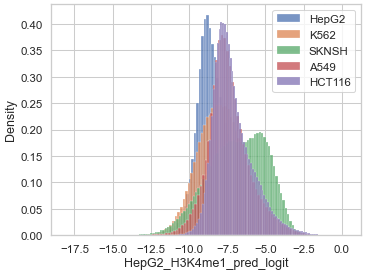

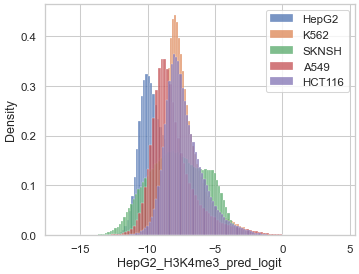

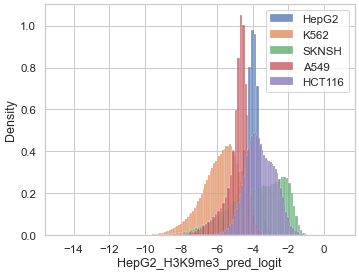

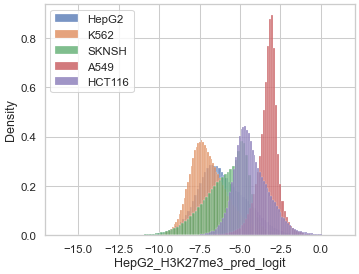

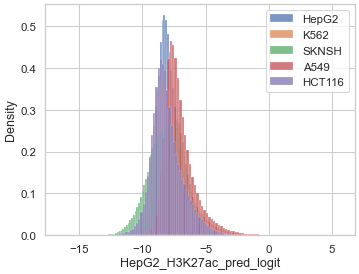

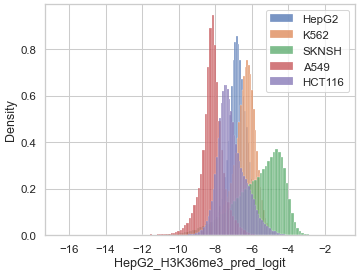

In [28]:
# cell_types = ['HepG2', 'K562', 'SKNSH', 'A549', 'HCT116']
# assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3']
# data_splits = ['train', 'valid', 'test']

for assay in assays:
    plt.figure(figsize=(8, 6), dpi=50)
    for cell_type in cell_types:
        for data_split in ['train']:
            selected_index = (main_df['chr'].isin(data_split_dict[data_split]))
            x = main_df[selected_index][f'{cell_type}_{assay}_pred_logit']
            y = main_df[selected_index][cell_type]
            sns.histplot(x, stat='density', bins=100, label=cell_type)
    plt.legend()

In [29]:
# normalize
for assay in assays:
    for cell_type in cell_types:
        data_split = 'train'
        selected_index = (main_df['chr'].isin(data_split_dict[data_split]))
        x = main_df[selected_index][f'{cell_type}_{assay}_pred_logit']
        x_mean = np.mean(x)
        x_std = np.std(x)
        # x_std = 1
        main_df[f'{cell_type}_{assay}_pred_logit_norm'] = (main_df[f'{cell_type}_{assay}_pred_logit'] - x_mean) / x_std


for cell_type in cell_types:
    data_split = 'train'
    selected_index = (main_df['chr'].isin(data_split_dict[data_split]))
    y = main_df[selected_index][f'{cell_type}']
    y_mean = 0
    y_std = np.std(y)
    main_df[f'{cell_type}_norm'] = (main_df[f'{cell_type}'] - y_mean) / y_std

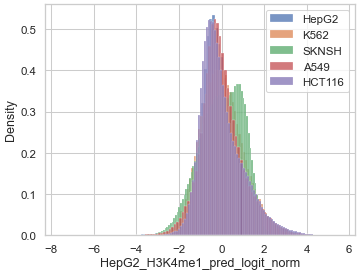

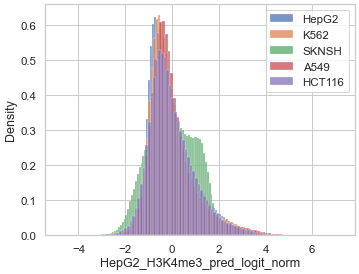

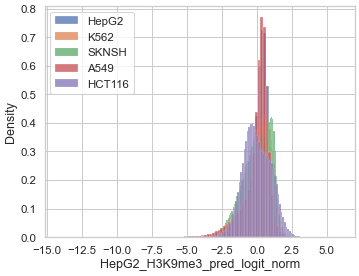

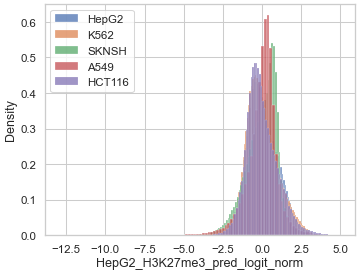

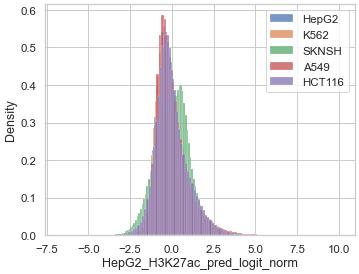

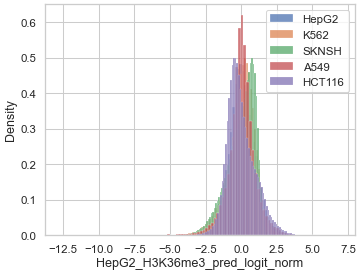

In [30]:
# cell_types = ['HepG2', 'K562', 'SKNSH', 'A549', 'HCT116']
# assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3']
# data_splits = ['train', 'valid', 'test']

for assay in assays:
    plt.figure(figsize=(8, 6), dpi=50)
    for cell_type in cell_types:
        for data_split in ['train']:
            selected_index = (main_df['chr'].isin(data_split_dict[data_split]))
            x = main_df[selected_index][f'{cell_type}_{assay}_pred_logit_norm']
            y = main_df[selected_index][cell_type]
            sns.histplot(x, stat='density', bins=100, label=cell_type)
    plt.legend()

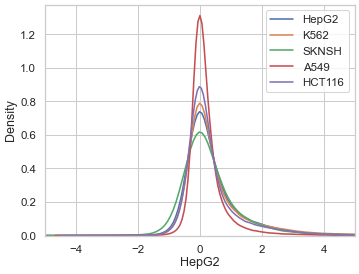

In [31]:
plt.figure(figsize=(8, 6), dpi=50)
for cell_type in cell_types:
    for data_split in ['train']:
        condition = (main_df['chr'].isin(data_split_dict[data_split]))
        y = main_df[condition][cell_type]
        sns.kdeplot(y, fill=False, label=cell_type)
        plt.xlim([-5, 5])
plt.legend()

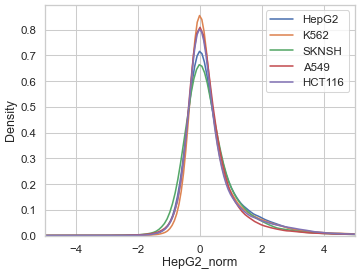

In [32]:
plt.figure(figsize=(8, 6), dpi=50)
for cell_type in cell_types:
    for data_split in ['train']:
        condition = (main_df['chr'].isin(data_split_dict[data_split]))
        y = main_df[condition][f'{cell_type}_norm']
        sns.kdeplot(y, fill=False, label=cell_type)
        plt.xlim([-5, 5])
plt.legend()

In [33]:
# for assay in assays:
#     plt.figure(figsize=(8, 6), dpi=50)
#     for cell_type in ['HepG2']:
#         for data_split in ['train', 'valid', 'test']:
#             selected_index = (main_df['chr'].isin(data_split_dict[data_split]))
#             x = logit(main_df[selected_index][f'{cell_type}_{assay}_pred'])
#             y = main_df[selected_index][cell_type]
#             sns.kdeplot(x, fill=False, label=data_split)
#     plt.legend()

In [34]:
# not normalize

# cell_types = ['HepG2', 'K562', 'SKNSH', 'A549', 'HCT116']
# # cell_types = ['HepG2', 'K562', 'SKNSH']
# assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3']
# data_splits = ['train', 'valid', 'test']


for cell_type in cell_types:
    # train
    data_split = 'train'
    print(f'train model by {cell_type} {data_split} data')
    condition = (main_df['chr'].isin(data_split_dict[data_split]))
    df = main_df[condition]
    selected_columns = [f'{cell_type}_{assay}_pred_logit' for assay in assays]
    X_train = np.array(df[selected_columns])
    y_train = np.array(df[cell_type])

    # Remove NaN in X_train or y_train
    mask = ~np.isnan(X_train).any(axis=1) & ~np.isnan(y_train)
    X_train = X_train[mask]
    y_train = y_train[mask]

    if len(X_train) == 0:
        continue

    # model = LinearRegression()
    model = Lasso(alpha=1e-2)
    model.fit(X_train, y_train)

    # valid
    for cell_type in cell_types:
        for data_split in data_splits:
            condition = (main_df['chr'].isin(data_split_dict[data_split]))
            df = main_df[condition]
            selected_columns = [f'{cell_type}_{assay}_pred_logit' for assay in assays]
            X_valid = np.array(df[selected_columns])
            y_valid = np.array(df[cell_type])

            mask = ~np.isnan(X_valid).any(axis=1) & ~np.isnan(y_valid)
            X_valid = X_valid[mask]
            y_valid = y_valid[mask]
            if len(X_valid) == 0:
                continue
            y_pred = model.predict(X_valid)
            # r = spearman(y_valid, y_pred)
            # print(f"{cell_type} {data_split} Spearman's rho: {r:.3f}")
            r = pearson(y_valid, y_pred)
            print(f"{cell_type} {data_split} Pearson's r: {r:.3f}")
    print()
    print(f'model weights')
    top_coef_index = np.abs(model.coef_).argsort()[::-1][:10]
    for i in top_coef_index:
        print(assays[i], model.coef_[i])
    print()

train model by HepG2 train data
HepG2 train Pearson's r: 0.581
HepG2 valid Pearson's r: 0.570
HepG2 test Pearson's r: 0.561
K562 train Pearson's r: 0.552
K562 valid Pearson's r: 0.541
K562 test Pearson's r: 0.532
SKNSH train Pearson's r: 0.197
SKNSH valid Pearson's r: 0.197
SKNSH test Pearson's r: 0.179
A549 train Pearson's r: 0.453
A549 valid Pearson's r: 0.466
A549 test Pearson's r: 0.443
HCT116 train Pearson's r: 0.303
HCT116 valid Pearson's r: 0.299
HCT116 test Pearson's r: 0.294

model weights
H3K4me3 0.4643079
H3K27me3 -0.3059461
H3K4me1 -0.06846059
H3K27ac -0.012218926
H3K9me3 0.00677729
H3K36me3 -0.0

train model by K562 train data
HepG2 train Pearson's r: 0.551
HepG2 valid Pearson's r: 0.540
HepG2 test Pearson's r: 0.531
K562 train Pearson's r: 0.591
K562 valid Pearson's r: 0.578
K562 test Pearson's r: 0.573
SKNSH train Pearson's r: 0.251
SKNSH valid Pearson's r: 0.255
SKNSH test Pearson's r: 0.235
A549 train Pearson's r: 0.451
A549 valid Pearson's r: 0.463
A549 test Pearson's

In [35]:
# # normalize input

# cell_types = ['HepG2', 'K562', 'SKNSH', 'A549', 'HCT116']
# assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3']
# data_splits = ['train', 'valid', 'test']


for cell_type in cell_types:
    # train
    data_split = 'train'
    print(f'train model by {cell_type} {data_split} data')
    condition = (main_df['chr'].isin(data_split_dict[data_split]))
    df = main_df[condition]
    selected_columns = [f'{cell_type}_{assay}_pred_logit_norm' for assay in assays]
    X_train = np.array(df[selected_columns])
    y_train = np.array(df[cell_type])

    # Remove NaN in X_train or y_train
    mask = ~np.isnan(X_train).any(axis=1) & ~np.isnan(y_train)
    X_train = X_train[mask]
    y_train = y_train[mask]

    if len(X_train) == 0:
        continue
    
    # model = LinearRegression()
    model = Lasso(alpha=1e-3)
    model.fit(X_train, y_train)

    # valid
    for cell_type in cell_types:
        for data_split in data_splits:
            condition = (main_df['chr'].isin(data_split_dict[data_split]))
            df = main_df[condition]
            selected_columns = [f'{cell_type}_{assay}_pred_logit_norm' for assay in assays]
            X_valid = np.array(df[selected_columns])
            y_valid = np.array(df[cell_type])

            mask = ~np.isnan(X_valid).any(axis=1) & ~np.isnan(y_valid)
            X_valid = X_valid[mask]
            y_valid = y_valid[mask]
            if len(X_valid) == 0:
                continue
            y_pred = model.predict(X_valid)
            r = pearson(y_valid, y_pred)
            print(f"{cell_type} {data_split} Pearson's r: {r:.3f}")
    print()

train model by HepG2 train data
HepG2 train Pearson's r: 0.585
HepG2 valid Pearson's r: 0.572
HepG2 test Pearson's r: 0.563
K562 train Pearson's r: 0.558
K562 valid Pearson's r: 0.545
K562 test Pearson's r: 0.538
SKNSH train Pearson's r: 0.173
SKNSH valid Pearson's r: 0.173
SKNSH test Pearson's r: 0.157
A549 train Pearson's r: 0.494
A549 valid Pearson's r: 0.509
A549 test Pearson's r: 0.479
HCT116 train Pearson's r: 0.309
HCT116 valid Pearson's r: 0.304
HCT116 test Pearson's r: 0.298

train model by K562 train data
HepG2 train Pearson's r: 0.529
HepG2 valid Pearson's r: 0.519
HepG2 test Pearson's r: 0.509
K562 train Pearson's r: 0.594
K562 valid Pearson's r: 0.581
K562 test Pearson's r: 0.574
SKNSH train Pearson's r: 0.187
SKNSH valid Pearson's r: 0.189
SKNSH test Pearson's r: 0.174
A549 train Pearson's r: 0.471
A549 valid Pearson's r: 0.484
A549 test Pearson's r: 0.455
HCT116 train Pearson's r: 0.309
HCT116 valid Pearson's r: 0.306
HCT116 test Pearson's r: 0.303

train model by SKNSH 

In [36]:
# # normalize input and ouput

# cell_types = ['HepG2', 'K562', 'SKNSH', 'A549', 'HCT116']
# data_splits = ['train', 'valid', 'test']
# assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3']

for cell_type in cell_types:
    # train
    data_split = 'train'
    print(f'train model by {cell_type} {data_split} data')
    condition = (main_df['chr'].isin(data_split_dict[data_split]))
    df = main_df[condition]
    selected_columns = [f'{cell_type}_{assay}_pred_logit_norm' for assay in assays]
    X_train = np.array(df[selected_columns])
    y_train = np.array(df[f'{cell_type}_norm'])

    # Remove NaN in X_train or y_train
    mask = ~np.isnan(X_train).any(axis=1) & ~np.isnan(y_train)
    X_train = X_train[mask]
    y_train = y_train[mask]

    if len(X_train) == 0:
        continue
    
    # model = LinearRegression()
    model = Lasso(alpha=1e-3)
    model.fit(X_train, y_train)

    # valid
    for cell_type in cell_types:
        for data_split in data_splits:
            condition = (main_df['chr'].isin(data_split_dict[data_split]))
            df = main_df[condition]
            selected_columns = [f'{cell_type}_{assay}_pred_logit_norm' for assay in assays]
            X_valid = np.array(df[selected_columns])
            y_valid = np.array(df[f'{cell_type}_norm'])

            mask = ~np.isnan(X_valid).any(axis=1) & ~np.isnan(y_valid)
            X_valid = X_valid[mask]
            y_valid = y_valid[mask]
            if len(X_valid) == 0:
                continue
            y_pred = model.predict(X_valid)
            r = pearson(y_valid, y_pred)
            print(f"{cell_type} {data_split} Pearson's r: {r:.3f}")
    print()

train model by HepG2 train data
HepG2 train Pearson's r: 0.585
HepG2 valid Pearson's r: 0.572
HepG2 test Pearson's r: 0.563
K562 train Pearson's r: 0.558
K562 valid Pearson's r: 0.544
K562 test Pearson's r: 0.538
SKNSH train Pearson's r: 0.173
SKNSH valid Pearson's r: 0.173
SKNSH test Pearson's r: 0.157
A549 train Pearson's r: 0.494
A549 valid Pearson's r: 0.509
A549 test Pearson's r: 0.479
HCT116 train Pearson's r: 0.309
HCT116 valid Pearson's r: 0.304
HCT116 test Pearson's r: 0.298

train model by K562 train data
HepG2 train Pearson's r: 0.529
HepG2 valid Pearson's r: 0.519
HepG2 test Pearson's r: 0.509
K562 train Pearson's r: 0.594
K562 valid Pearson's r: 0.581
K562 test Pearson's r: 0.574
SKNSH train Pearson's r: 0.188
SKNSH valid Pearson's r: 0.190
SKNSH test Pearson's r: 0.175
A549 train Pearson's r: 0.472
A549 valid Pearson's r: 0.484
A549 test Pearson's r: 0.455
HCT116 train Pearson's r: 0.308
HCT116 valid Pearson's r: 0.306
HCT116 test Pearson's r: 0.303

train model by SKNSH 

In [37]:
cell_types = ['HepG2', 'K562', 'A549']

In [39]:
# leave-one-out cross-validation
# no norm

for cell_type in cell_types:
    # train
    data_split = 'train'
    print(f'train model by not {cell_type} {data_split} data')

    X_train = []
    y_train = []
    for train_cell_type in cell_types:
        if train_cell_type == cell_type:
            continue
        condition = (main_df['chr'].isin(data_split_dict[data_split]))
        df = main_df[condition]

        selected_columns = [f'{train_cell_type}_{assay}_pred_logit' for assay in assays]
        X_train.append(df[selected_columns])
        y_train.append(df[f'{train_cell_type}'])

    X_train = np.concatenate(X_train, axis=0)
    y_train = np.concatenate(y_train, axis=0)

    # Remove rows with NaN values in X_train or y_train
    mask = ~np.isnan(X_train).any(axis=1) & ~np.isnan(y_train)
    X_train = X_train[mask]
    y_train = y_train[mask]
    if len(X_train) == 0:
        continue

    # model = LinearRegression()
    model = Lasso(alpha=1e-3)
    model.fit(X_train, y_train)


    # valid
    for valid_cell_type in cell_types:
        print(f'valid model')
        for data_split in data_splits:

            condition = (main_df['chr'].isin(data_split_dict[data_split]))
            df = main_df[condition]

            selected_columns = [f'{valid_cell_type}_{assay}_pred_logit' for assay in assays]
            X_valid = np.array(df[selected_columns])
            y_valid = np.array(df[f'{valid_cell_type}'])

            # remove nan
            mask = ~np.isnan(X_valid).any(axis=1) & ~np.isnan(y_valid)
            X_valid = X_valid[mask]
            y_valid = y_valid[mask]
            if len(X_valid) == 0:
                continue

            y_pred = model.predict(X_valid)
            r = pearson(y_valid, y_pred)
            print(f"{valid_cell_type} {data_split} Pearson's r: {r:.3f}")
    print()
    # print(f'model weights')
    # top_coef_index = np.abs(model.coef_).argsort()[::-1][:10]
    # for i in top_coef_index:
    #     print(assays[i], model.coef_[i])
    # print()

train model by not HepG2 train data
valid model
HepG2 train Pearson's r: 0.481
HepG2 valid Pearson's r: 0.473
HepG2 test Pearson's r: 0.467
valid model
K562 train Pearson's r: 0.568
K562 valid Pearson's r: 0.559
K562 test Pearson's r: 0.555
valid model
A549 train Pearson's r: 0.451
A549 valid Pearson's r: 0.461
A549 test Pearson's r: 0.441

train model by not K562 train data
valid model
HepG2 train Pearson's r: 0.577
HepG2 valid Pearson's r: 0.565
HepG2 test Pearson's r: 0.555
valid model
K562 train Pearson's r: 0.477
K562 valid Pearson's r: 0.467
K562 test Pearson's r: 0.447
valid model
A549 train Pearson's r: 0.464
A549 valid Pearson's r: 0.478
A549 test Pearson's r: 0.450

train model by not A549 train data
valid model
HepG2 train Pearson's r: 0.555
HepG2 valid Pearson's r: 0.542
HepG2 test Pearson's r: 0.532
valid model
K562 train Pearson's r: 0.550
K562 valid Pearson's r: 0.538
K562 test Pearson's r: 0.533
valid model
A549 train Pearson's r: 0.436
A549 valid Pearson's r: 0.451
A54

In [42]:
# leave-one-out cross-validation
# input norm

for cell_type in cell_types:
    # train
    data_split = 'train'
    print(f'train model by not {cell_type} data')

    X_train = []
    y_train = []
    for train_cell_type in cell_types:
        if train_cell_type == cell_type:
            continue
        condition = (main_df['chr'].isin(data_split_dict[data_split]))
        df = main_df[condition]

        selected_columns = [f'{train_cell_type}_{assay}_pred_logit_norm' for assay in assays]
        X_train.append(df[selected_columns])
        y_train.append(df[f'{train_cell_type}'])

    X_train = np.concatenate(X_train, axis=0)
    y_train = np.concatenate(y_train, axis=0)

    # Remove rows with NaN values in X_train or y_train
    mask = ~np.isnan(X_train).any(axis=1) & ~np.isnan(y_train)
    X_train = X_train[mask]
    y_train = y_train[mask]
    if len(X_train) == 0:
        continue

    # model = LinearRegression()
    model = Lasso(alpha=1e-3)
    model.fit(X_train, y_train)


    # valid
    for valid_cell_type in cell_types:
        print(f'valid model')
        for data_split in data_splits:

            condition = (main_df['chr'].isin(data_split_dict[data_split]))
            df = main_df[condition]

            selected_columns = [f'{valid_cell_type}_{assay}_pred_logit_norm' for assay in assays]
            X_valid = np.array(df[selected_columns])
            y_valid = np.array(df[f'{valid_cell_type}'])

            # remove nan
            mask = ~np.isnan(X_valid).any(axis=1) & ~np.isnan(y_valid)
            X_valid = X_valid[mask]
            y_valid = y_valid[mask]
            if len(X_valid) == 0:
                continue

            y_pred = model.predict(X_valid)
            r = pearson(y_valid, y_pred)
            print(f"{valid_cell_type} {data_split} Pearson's r: {r:.3f}")
    print()
    # print(f'model weights')
    # top_coef_index = np.abs(model.coef_).argsort()[::-1][:10]
    # for i in top_coef_index:
    #     print(assays[i], model.coef_[i])
    # print()

train model by not HepG2 data
valid model
HepG2 train Pearson's r: 0.561
HepG2 valid Pearson's r: 0.550
HepG2 test Pearson's r: 0.541
valid model
K562 train Pearson's r: 0.579
K562 valid Pearson's r: 0.568
K562 test Pearson's r: 0.563
valid model
A549 train Pearson's r: 0.483
A549 valid Pearson's r: 0.495
A549 test Pearson's r: 0.467

train model by not K562 data
valid model
HepG2 train Pearson's r: 0.576
HepG2 valid Pearson's r: 0.564
HepG2 test Pearson's r: 0.555
valid model
K562 train Pearson's r: 0.538
K562 valid Pearson's r: 0.527
K562 test Pearson's r: 0.520
valid model
A549 train Pearson's r: 0.488
A549 valid Pearson's r: 0.502
A549 test Pearson's r: 0.473

train model by not A549 data
valid model
HepG2 train Pearson's r: 0.576
HepG2 valid Pearson's r: 0.564
HepG2 test Pearson's r: 0.554
valid model
K562 train Pearson's r: 0.581
K562 valid Pearson's r: 0.568
K562 test Pearson's r: 0.562
valid model
A549 train Pearson's r: 0.489
A549 valid Pearson's r: 0.503
A549 test Pearson's r

In [43]:
# leave-one-out cross-validation
# input norm output norm

for cell_type in cell_types:
    # train
    data_split = 'train'
    print(f'train model by not {cell_type} {data_split} data')

    X_train = []
    y_train = []
    for train_cell_type in cell_types:
        if train_cell_type == cell_type:
            continue
        condition = (main_df['chr'].isin(data_split_dict[data_split]))
        df = main_df[condition]

        selected_columns = [f'{train_cell_type}_{assay}_pred_logit_norm' for assay in assays]
        X_train.append(df[selected_columns])
        y_train.append(df[f'{train_cell_type}_norm'])

    X_train = np.concatenate(X_train, axis=0)
    y_train = np.concatenate(y_train, axis=0)

    # Remove rows with NaN values in X_train or y_train
    mask = ~np.isnan(X_train).any(axis=1) & ~np.isnan(y_train)
    X_train = X_train[mask]
    y_train = y_train[mask]
    if len(X_train) == 0:
        continue

    # model = LinearRegression()
    model = Lasso(alpha=1e-3)
    model.fit(X_train, y_train)


    # valid
    for valid_cell_type in cell_types:
        print(f'valid model')
        for data_split in data_splits:

            condition = (main_df['chr'].isin(data_split_dict[data_split]))
            df = main_df[condition]

            selected_columns = [f'{valid_cell_type}_{assay}_pred_logit_norm' for assay in assays]
            X_valid = np.array(df[selected_columns])
            y_valid = np.array(df[f'{valid_cell_type}_norm'])

            # remove nan
            mask = ~np.isnan(X_valid).any(axis=1) & ~np.isnan(y_valid)
            X_valid = X_valid[mask]
            y_valid = y_valid[mask]
            if len(X_valid) == 0:
                continue

            y_pred = model.predict(X_valid)
            r = pearson(y_valid, y_pred)
            print(f"{valid_cell_type} {data_split} Pearson's r: {r:.3f}")
    print()
    # print(f'model weights')
    # top_coef_index = np.abs(model.coef_).argsort()[::-1][:10]
    # for i in top_coef_index:
    #     print(assays[i], model.coef_[i])
    # print()

train model by not HepG2 train data
valid model
HepG2 train Pearson's r: 0.561
HepG2 valid Pearson's r: 0.550
HepG2 test Pearson's r: 0.541
valid model
K562 train Pearson's r: 0.585
K562 valid Pearson's r: 0.573
K562 test Pearson's r: 0.568
valid model
A549 train Pearson's r: 0.487
A549 valid Pearson's r: 0.499
A549 test Pearson's r: 0.471

train model by not K562 train data
valid model
HepG2 train Pearson's r: 0.581
HepG2 valid Pearson's r: 0.569
HepG2 test Pearson's r: 0.560
valid model
K562 train Pearson's r: 0.550
K562 valid Pearson's r: 0.538
K562 test Pearson's r: 0.531
valid model
A549 train Pearson's r: 0.496
A549 valid Pearson's r: 0.510
A549 test Pearson's r: 0.481

train model by not A549 train data
valid model
HepG2 train Pearson's r: 0.576
HepG2 valid Pearson's r: 0.565
HepG2 test Pearson's r: 0.554
valid model
K562 train Pearson's r: 0.581
K562 valid Pearson's r: 0.568
K562 test Pearson's r: 0.562
valid model
A549 train Pearson's r: 0.489
A549 valid Pearson's r: 0.503
A54

In [ ]:
# cell_type = 'HepG2'
# cell_type_2 = 'K562'
# assay = 'Dnase'

# x = main_df[f'{cell_type}_{assay}_pred_logit']
# y = main_df[cell_type_2]
# r = pearsonr(x, y)[0]
# print(f'pearson r = {r:.3f}')

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=x, y=y, s=1, edgecolor=None)
# plt.xlabel(f'{cell_type}_{assay}_pred_logit')
# plt.ylabel(f'{cell_type_2}_MPRA_true')
# plt.text(x=0.1, y=0.9, s=f'pearson r = {r:.3f}', transform=plt.gca().transAxes, fontsize=16)
# plt.savefig(f'figures/{cell_type}_{assay}_pred_logit_1.png', dpi=300, bbox_inches='tight')

In [ ]:
# cell_type = 'K562'
# cell_type_2 = 'HepG2'
# assay = 'Dnase'

# x = main_df[f'{cell_type}_{assay}_pred_logit']
# y = main_df[cell_type_2]
# r = pearsonr(x, y)[0]
# print(f'pearson r = {r:.3f}')

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=x, y=y, s=1, edgecolor=None)
# plt.xlabel(f'{cell_type}_{assay}_pred_logit')
# plt.ylabel(f'{cell_type_2}_MPRA_true')
# plt.text(x=0.1, y=0.9, s=f'pearson r = {r:.3f}', transform=plt.gca().transAxes, fontsize=16)
# plt.savefig(f'figures/{cell_type}_{assay}_pred_logit_1.png', dpi=300, bbox_inches='tight')

In [ ]:
# plot_logit_diff(main_df, 'HepG2', 'K562', 'DNase')
# plot_logit_diff(main_df, 'HepG2', 'SKNSH', 'DNase')
# plot_logit_diff(main_df, 'K562', 'SKNSH', 'DNase')